In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

STRETCH GRID CREATE

In [35]:
delta = 2*np.pi
outer_grid_points = int(84)
central_grid_points = 448
# outer_grid_points = int(80)
# central_grid_points = 512
central_LY = 1.25*delta
x = np.zeros(outer_grid_points) 
spacing=central_LY/central_grid_points
total_grid_points = 2*outer_grid_points+central_grid_points+1
print('total grid points:', total_grid_points)
print('spacing: ', spacing)

total grid points: 617
spacing:  0.017531209004407328


In [36]:
x[0]
for i in range(outer_grid_points): 
    if i ==0:
        x[i]=spacing
    else:
        # x[i] = x[i-1]*1.035
        x[i] = x[i-1]*1.028
        
print(np.sum(x))

5.742947258256472


In [37]:
y_middle = np.linspace(-central_LY/2-spacing/2,central_LY/2+spacing/2, central_grid_points+2)
y_upper = y_middle[-1] + np.cumsum(x)
y_lower = -np.flip(y_upper)
y = np.concatenate((y_lower, y_middle, y_upper))
gyf = (y[:-1] + y[1:])/2

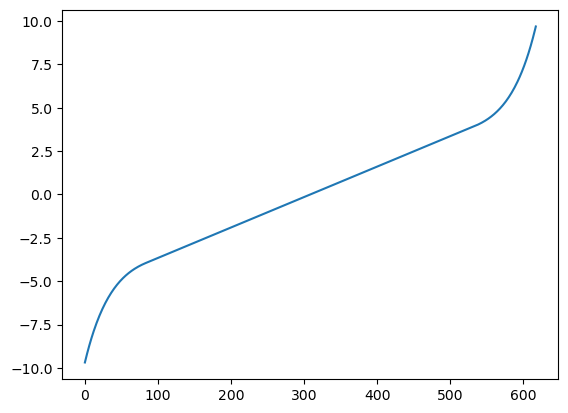

In [38]:
plt.plot(y)

In [39]:
gyf[-1]-gyf[0]

19.18393096626655

In [40]:
grid = h5py.File('grid.h5','w')
grid.create_group('grids')
grid.create_dataset('grids/y', data=y)
grid.close()

In [41]:
np.save('grid_gyf', gyf)

In [42]:
zdim=256
ydim=total_grid_points
xdim=512
y_nodes = 28
amp=0.1
T_start = 0
print('NY:', (total_grid_points-1)/y_nodes+1)

NY: 23.0


In [54]:
L = 2*np.pi
x,y,z = np.linspace(-L,L,512),gyf,np.linspace(0,L,256)
x,y,z = np.meshgrid(y,x,z)

In [55]:
#Params
kx, ky, kz = -1,1,4
Fr = 1
Ri = 1
s = 1

omega = np.sqrt(Ri*(kx**2+ky**2)/(kx**2+ky**2+kz**2))
print(Fr, omega)

1 0.3333333333333333


In [56]:
#find trapping location
print(np.arctanh((omega-np.sqrt(Ri))/kx -1), ((omega-np.sqrt(Ri))/kx -1))

-0.3465735902799726 -0.33333333333333326


In [62]:
u = np.tanh(y) + Ri*np.exp(-(y+2)**2)*s*omega*kx/(kx**2+ky**2)*np.sin(kx*x+ky*y+kz*z)
v = Ri*np.exp(-(y+2)**2)*s*omega*ky/(kx**2+ky**2)*np.sin(kx*x+ky*y+kz*z)
w = -np.exp(-(y+2)**2)*s*omega/kz*np.sin(kx*x+ky*y+kz*z)
b = np.exp(-(y+2)**2)*s/kz*np.cos(kx*x+ky*y+kz*z)
b_t = b + z

In [58]:
u.shape

(512, 617, 256)

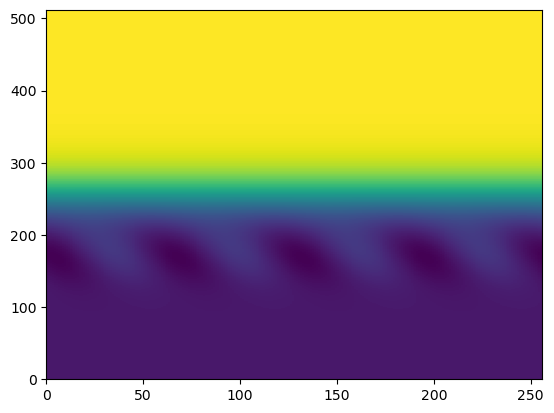

In [72]:
plt.pcolormesh(u[:,0,:])

In [63]:
U = np.swapaxes(u,0,2)
V = np.swapaxes(v,0,2)
W = np.swapaxes(w,0,2)
TH = np.swapaxes(b,0,2)

In [64]:
V.shape

(256, 617, 512)

In [67]:
with h5py.File('start.h5', 'w') as hf:
        hf.attrs['Resolution'] = np.array([xdim,ydim,zdim])
        hf.create_group('Timestep')
        hf['Timestep'].attrs['Time'] = T_start
        hf.create_dataset('Timestep/U', data=U)
        hf.create_dataset('Timestep/V', data=V)
        hf.create_dataset('Timestep/W', data=W)
        hf.create_dataset('Timestep/TH1', data=TH)            
        print('Saved file start.h5 in current working directory')

Saved file start.h5 in current working directory


In [68]:
print(U.shape, V.shape, W.shape, TH.shape)

(256, 617, 512) (256, 617, 512) (256, 617, 512) (256, 617, 512)
